# Visualizing the differences between the subdatasets for the machine learning model
Created 2025-01-22


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.axes._axes import Axes as matplotlib_Axis
from pathlib import Path
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import sklearn
import pickle
import re
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, auc

In [2]:
AF_prediction_path = Path("../ressources/AF_predictions").resolve()
AF_prediction_results = Path("../ressources/AF_predictions/AF_prediction_randomized_DMI_results.xlsx").resolve()
AF_prediction_metrics = Path("../ressources/AF_predictions/AF_metrics_all_structures.tsv").resolve()
AF_DMI_structures_folders = [Path("../ressources/AF_DMI_structures").resolve() / p for p in ['AF_DMI_structures1', 'AF_DMI_structures2', 'AF_DMI_structures3', "AF_DMI_mutated_structures"]]
AF_DDI_structures_path = Path("../ressources/AF_DDI_structures").resolve()
solved_DMI_structures_path = Path("../ressources/DMI_solved_structures_hydrogens").resolve()
solved_DDI_structures_path = Path("../ressources/DDI_solved_structures_hydrogens").resolve()

for p in [AF_prediction_results, AF_prediction_metrics, AF_DDI_structures_path, solved_DMI_structures_path, solved_DDI_structures_path] + AF_DMI_structures_folders:
    if not p.exists():
        print(f"{p} does not point to a valid path")

In [41]:
dataAF = pd.read_csv(AF_prediction_path / "data_af.csv")
dataAF.index = dataAF["prediction_name"] + "_" + dataAF["model_id"]
dataAF["min_distance"] = dataAF["min_distance"].fillna(value=20)
print(dataAF.columns)
dataAF

Index(['project_name', 'prediction_name', 'run_id', 'chainA_length',
       'chainB_length', 'model_id', 'model_confidence',
       'chainA_intf_avg_plddt', 'chainB_intf_avg_plddt', 'intf_avg_plddt',
       'pDockQ', 'iPAE', 'num_chainA_intf_res', 'num_chainB_intf_res',
       'num_res_res_contact', 'num_atom_atom_contact', 'RMSD_domain',
       'num_align_atoms_domain', 'align_score_domain', 'num_align_resi_domain',
       'RMSD_backbone_peptide', 'RMSD_all_atom_peptide', 'known_motif_plddt',
       'DockQ', 'iRMS', 'LRMS', 'Fnonnat', 'num_mutation_in_motif', 'label',
       'structure_name', 'file', 'hbonds', 'salt_bridges', 'buried_area',
       'min_distance', 'hydrophobic_interactions'],
      dtype='object')


,project_name,prediction_name,run_id,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,...,Fnonnat,num_mutation_in_motif,label,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
DEG_APCC_KENBOX_2_4GGD_ranked_0,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_0,0.887117,96.107999,77.495999,91.454999,...,0.087,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,613.651,6.063,0
DEG_APCC_KENBOX_2_4GGD_ranked_1,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_1,0.871984,95.793846,73.986000,89.736111,...,0.050,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,580.310,6.083,0
DEG_APCC_KENBOX_2_4GGD_ranked_2,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_2,0.760784,95.547501,57.906001,86.585239,...,0.185,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,662.104,6.072,3
DEG_APCC_KENBOX_2_4GGD_ranked_3,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_3,0.413662,94.646667,21.510000,76.362500,...,0.364,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,398.498,5.417,0
DEG_APCC_KENBOX_2_4GGD_ranked_4,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_4,0.359078,94.830001,19.753333,72.307001,...,0.889,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,323.304,5.092,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74_ranked_0,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_0,0.298701,49.827778,73.161904,62.392307,...,NaN,random minimal DDI,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0.pdb,7,3,1617.382,5.591,56
D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74_ranked_1,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_1,0.246961,54.362000,76.415000,66.390909,...,NaN,random minimal DDI,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1.pdb,3,0,791.256,6.373,7
D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74_ranked_2,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_2,0.211579,52.651538,72.910908,61.937083,...,NaN,random minimal DDI,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2.pdb,2,1,882.547,7.906,11
D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74_ranked_3,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_3,0.211144,50.398334,78.798751,66.627144,...,NaN,random minimal DDI,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3.pdb,7,5,1020.896,4.628,44


In [42]:
X_columns = ["model_confidence", "chainA_intf_avg_plddt", "chainB_intf_avg_plddt", "intf_avg_plddt", "pDockQ", "iPAE", 
            "buried_area", "min_distance", "hbonds", "salt_bridges", "hydrophobic_interactions",
            "num_chainA_intf_res", "num_chainB_intf_res", "num_res_res_contact", "num_atom_atom_contact", "chainA_length", "chainB_length"]
dataAF_randomDMI = dataAF[np.logical_or(dataAF["num_mutation_in_motif"] == "known minimal", dataAF["num_mutation_in_motif"] == "random minimal")]
dataAF_mutated1DMI = dataAF[np.logical_or(dataAF["num_mutation_in_motif"] == "known minimal", dataAF["num_mutation_in_motif"] == "1")]
dataAF_mutated2DMI = dataAF[np.logical_or(dataAF["num_mutation_in_motif"] == "known minimal", dataAF["num_mutation_in_motif"] == "2")]
dataAF_randomDDI = dataAF[np.logical_or(dataAF["num_mutation_in_motif"] == "approved minimal DDI", dataAF["num_mutation_in_motif"] == "random minimal DDI")]

print(dataAF_randomDMI.shape, dataAF_mutated1DMI.shape, dataAF_mutated2DMI.shape, dataAF_randomDDI.shape)


randomDMI_xy = train_test_split(dataAF_randomDMI[X_columns], dataAF_randomDMI["label"], test_size=0.2, random_state=2501)
mutated1DMI_xy = train_test_split(dataAF_mutated1DMI[X_columns], dataAF_mutated1DMI["label"], test_size=0.2, random_state=2501)
mutated2DMI_xy = train_test_split(dataAF_mutated2DMI[X_columns], dataAF_mutated2DMI["label"], test_size=0.2, random_state=2501)
randomDDI_xy = train_test_split(dataAF_randomDDI[X_columns], dataAF_randomDDI["label"], test_size=0.2, random_state=2501)

print("Random DMI: Train", randomDMI_xy[0].shape, "Test", randomDMI_xy[1].shape)
print("1 Mutation DMI: Train", mutated1DMI_xy[0].shape, "Test", mutated1DMI_xy[1].shape)
print("2 Mutation DMI: Train", mutated2DMI_xy[0].shape, "Test", mutated2DMI_xy[1].shape)
print("Random DDI: Train", randomDDI_xy[0].shape, "Test", randomDDI_xy[1].shape)


(1332, 36) (1332, 36) (1332, 36) (453, 36)
Random DMI: Train (1065, 17) Test (267, 17)
1 Mutation DMI: Train (1065, 17) Test (267, 17)
2 Mutation DMI: Train (1065, 17) Test (267, 17)
Random DDI: Train (362, 17) Test (91, 17)


In [58]:
rf_param_grid_randomDMI = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [150, 200, 250],
    "max_depth": [4, 6, 8, 10, 12],
    "min_samples_leaf": [1,2,3,4,5,10],
    "max_features" : [4,5,6]
}

rf_randomDMI = RandomForestClassifier(random_state=2501)
random_search_randomDMI = RandomizedSearchCV(n_iter=10, estimator=rf_randomDMI, param_distributions=rf_param_grid_randomDMI, scoring='accuracy', n_jobs=-1, verbose=2, random_state=2501)
random_search_randomDMI.fit(randomDMI_xy[0], randomDMI_xy[2])
rf_best_randomDMI = random_search_randomDMI.best_estimator_
rf_best_randomDMI

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomForestClassifier(criterion='log_loss', max_depth=12, max_features=6,
                       n_estimators=250, random_state=2501)

In [61]:
rf_param_grid_randomDDI = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [150, 200, 250],
    "max_depth": [4, 6, 8, 10, 12],
    "min_samples_leaf": [1,2,3,4,5,10],
    "max_features" : [4,5,6]
}

rf_randomDDI = RandomForestClassifier(random_state=2501)
random_search_randomDDI = RandomizedSearchCV(n_iter=10, estimator=rf_randomDDI, param_distributions=rf_param_grid_randomDDI, scoring='accuracy', n_jobs=-1, verbose=2, random_state=2501)
random_search_randomDDI.fit(randomDDI_xy[0], randomDDI_xy[2])
rf_best_randomDDI = random_search_randomDDI.best_estimator_
rf_best_randomDDI

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomForestClassifier(criterion='log_loss', max_depth=12, max_features=6,
                       n_estimators=250, random_state=2501)

In [66]:
rf_param_grid_mutated1DMI = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [150, 200, 250],
    "max_depth": [4, 6, 8, 10, 12],
    "min_samples_leaf": [1,2,3,4,5,10],
    "max_features" : [4,5,6]
}

rf_mutated1DMI = RandomForestClassifier(random_state=2501)
random_search_mutated1DMI = RandomizedSearchCV(n_iter=10, estimator=rf_mutated1DMI, param_distributions=rf_param_grid_mutated1DMI, scoring='accuracy', n_jobs=-1, verbose=2, random_state=2501)
random_search_mutated1DMI.fit(mutated1DMI_xy[0], mutated1DMI_xy[2])
rf_best_mutated1DMI = random_search_mutated1DMI.best_estimator_
rf_best_mutated1DMI

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomForestClassifier(criterion='log_loss', max_depth=12, max_features=6,
                       n_estimators=250, random_state=2501)

In [67]:
rf_param_grid_mutated2DMI = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [150, 200, 250],
    "max_depth": [4, 6, 8, 10, 12],
    "min_samples_leaf": [1,2,3,4,5,10],
    "max_features" : [4,5,6]
}

rf_mutated2DMI = RandomForestClassifier(random_state=2501)
random_search_mutated2DMI = RandomizedSearchCV(n_iter=10, estimator=rf_mutated2DMI, param_distributions=rf_param_grid_mutated2DMI, scoring='accuracy', n_jobs=-1, verbose=2, random_state=2501)
random_search_mutated2DMI.fit(mutated2DMI_xy[0], mutated2DMI_xy[2])
rf_best_mutated2DMI = random_search_mutated2DMI.best_estimator_
rf_best_mutated2DMI

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomForestClassifier(criterion='log_loss', max_depth=12, max_features=6,
                       n_estimators=250, random_state=2501)

In [98]:
result_array = [
   ("random DMI", rf_best_randomDMI, randomDMI_xy),
   ("1 mutation DMI", rf_best_mutated1DMI, mutated1DMI_xy),
   ("2 mutation DMI", rf_best_mutated2DMI, mutated2DMI_xy),
   ("random DDI", rf_best_randomDDI, randomDDI_xy)
]

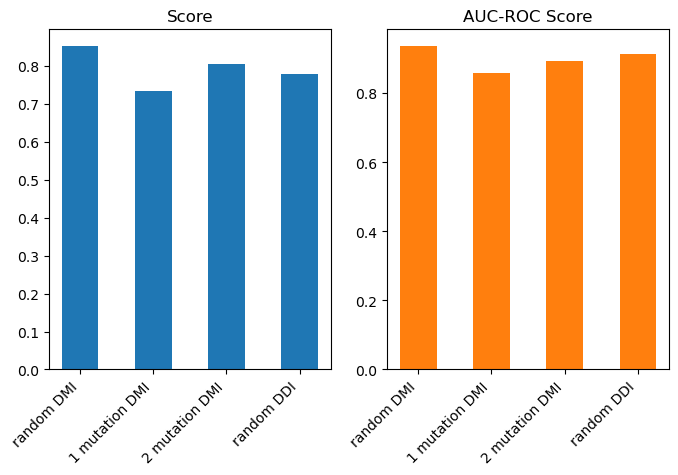

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(8,5))
barlabels = [x[0] for x in result_array]
scores = [accuracy_score(x[2][3], x[1].predict(x[2][1])) for x in result_array]
rocscore = [roc_auc_score(x[2][3], x[1].predict_proba(x[2][1])[:, 1]) for x in result_array]
_barScore = axes[0].bar(barlabels, scores, width=0.5)
_barROC = axes[1].bar(barlabels, rocscore, color="tab:orange", width=0.5)
axes[0].set_title("Score")
axes[1].set_title("AUC-ROC Score")
fig.autofmt_xdate(rotation=45)
plt.show()

In [148]:
rf_best_randomDMI.predict_proba(randomDMI_xy[1])[:, 1]

array([1.        , 0.05564887, 0.12018131, 0.31680783, 0.2006117 ,
       0.2246743 , 0.5300151 , 0.49445696, 0.996     , 0.996     ,
       0.52993442, 0.20721247, 0.55707348, 0.18615667, 0.64037235,
       0.884     , 0.996     , 0.15612614, 0.11542966, 0.10041108,
       0.98      , 0.53261246, 0.988     , 0.17433668, 1.        ,
       0.2230689 , 0.42025347, 0.14588571, 0.24301746, 0.12280232,
       0.13005792, 0.992     , 0.20456174, 0.17760832, 0.24610949,
       0.14874087, 1.        , 0.17349352, 0.23453621, 0.996     ,
       0.19763552, 0.56381031, 0.984     , 0.5454285 , 0.51718175,
       0.1045536 , 0.18865088, 1.        , 0.30047132, 0.08356748,
       0.21268686, 0.23779643, 0.08343559, 0.32802078, 0.23136828,
       0.08675041, 0.48807708, 1.        , 0.45342083, 0.60096572,
       0.74816947, 0.93611497, 0.1369334 , 0.14721415, 0.8473539 ,
       0.0602244 , 0.19274759, 0.113194  , 0.2119995 , 0.996     ,
       0.976     , 0.56055129, 0.17706527, 0.0841257 , 0.07405

In [143]:
accuracy_score(randomDMI_xy[3], rf_best_randomDMI.predict_proba(randomDMI_xy[1]))

0.8539325842696629

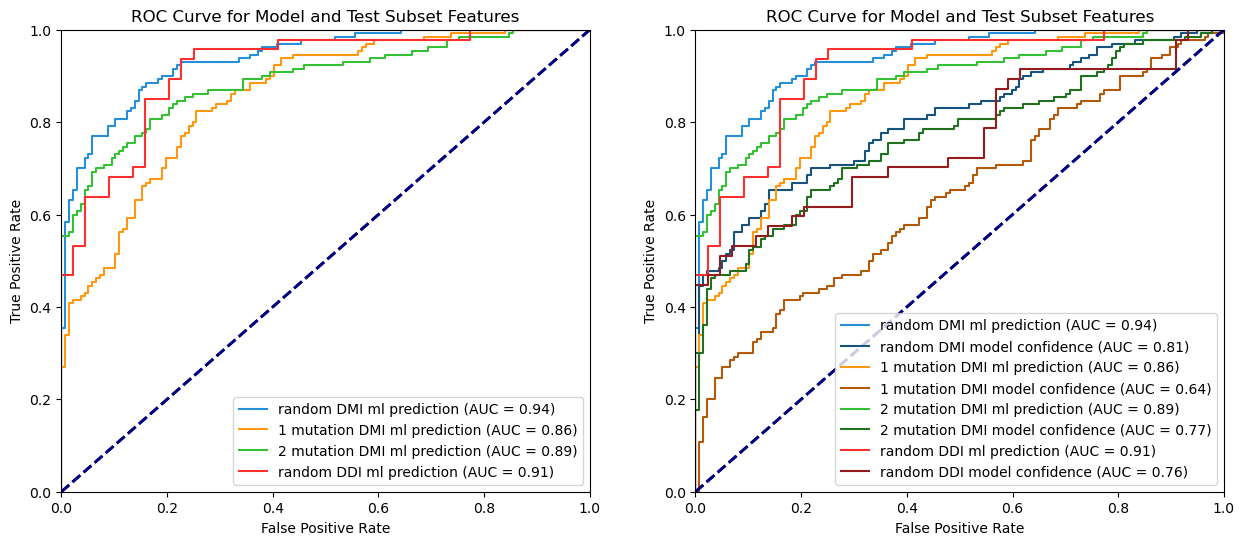

In [99]:
# Roc Curve
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax1, ax2 = axes
for name, model, xy in result_array:
   y_preda = model.predict_proba(xy[1])
    
   roc_conf_X, roc_conf_Y, _ = roc_curve(xy[3], xy[1]["model_confidence"])
   roc_conf = auc(roc_conf_X, roc_conf_Y)
   roc_model_X, roc_model_Y, _ = roc_curve(xy[3], y_preda[:, 1])
   roc_model = auc(roc_model_X, roc_model_Y)

   _line2D = ax1.plot(roc_model_X, roc_model_Y, label=f"{name} ml prediction (AUC = {roc_model:.2f})")[0]
   c = np.array(colors.to_rgb(_line2D.get_color()))
   c1 = np.clip(1.2*c, a_max=1, a_min=None)
   c2 = 0.7*c
   _line2D.set_color(c1)
   ax2.plot(roc_model_X, roc_model_Y, label=f"{name} ml prediction (AUC = {roc_model:.2f})", color=c1)
   
   ax2.plot(roc_conf_X, roc_conf_Y, label=f"{name} model confidence (AUC = {roc_conf:.2f})", color=c2)
for ax in [ax1, ax2]:   
   ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
   ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
   ax.set_xlim([0,1])
   ax.set_ylim([0,1])
   ax.set_xlabel('False Positive Rate')
   ax.set_ylabel('True Positive Rate')
   ax.set_title("ROC Curve for Model and Test Subset Features")
   ax.legend(loc="lower right")
plt.show()

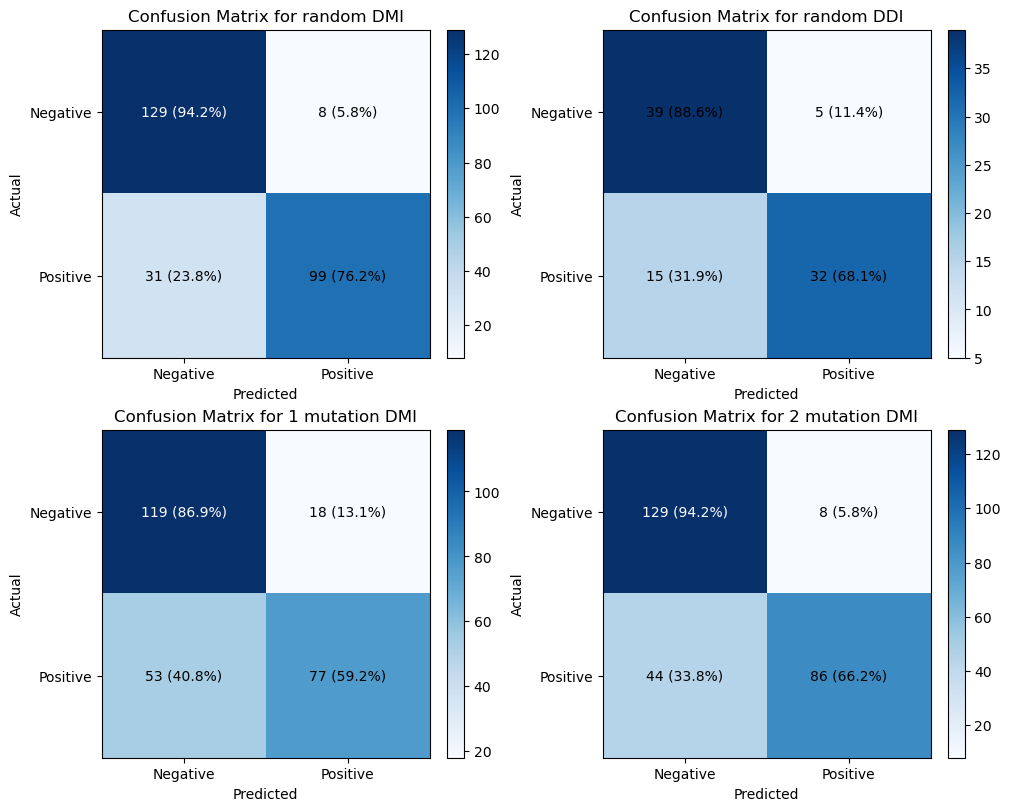

In [188]:
fig, axes = plt.subplots(2, 2, figsize=(10,8), constrained_layout=True)
axes = axes.flatten()
for i, (name, model, xy) in enumerate(result_array[0:1] + result_array[3:4] + result_array[1:3]): # Rearrange order
    y_pred = model.predict(xy[1])
    ax: matplotlib_Axis = axes[i]
    ax.set_title(f"Confusion Matrix for {name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    cm = confusion_matrix(xy[3], y_pred)
    imshow_cm = ax.imshow(cm, cmap="Blues")
    fig.colorbar(imshow_cm, ax=ax)
    ax.set_xticks(range(cm.shape[0]), labels=["Negative", "Positive"])
    ax.set_yticks(range(cm.shape[1]), labels=["Negative", "Positive"])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            c = "black" if colors.rgb_to_hsv(imshow_cm.cmap(cm[i,j])[:3])[1] < 0.4 else "white"
            text = f"{cm[i,j]} ({round(100*(cm[i,j]/sum(cm[i])), 1)}%)"
            ax.text(j, i, text, ha="center", va="center", color=c)
plt.show()